In [44]:
#Check the enviroment that Jupyter is using:
#import sys
#sys.executable

#NOTE on scikit-learn: Is used for typical Machine Learning Algorihms and not Deep-learning.

import numpy as np
#Machine learning library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Image processing library:
from skimage import io, color
'''
Note on Tensorflow: Uses Nvidia drivers and CUDA for parallel execution: https://developer.nvidia.com/cuda-toolkit
Else Tensorflow will fall back using the CPU.
Also: We can use cuDNN for GPU acceleration: 
https://developer.nvidia.com/cudnn
'''
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Plotting library:
import matplotlib.pyplot as plt
#CSV handler: https://docs.python.org/3/library/csv.html 
import csv
#Web handler: https://pypi.org/project/requests/
import requests 
# https://pandas.pydata.org/ 
import pandas as pd 
#Pillow library for images: https://pypi.org/project/Pillow/
from PIL import Image
#BytesIO: https://docs.python.org/3/library/io.html
from io import BytesIO
import io
#For concurrency and asynchronous operation
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor
import threading
import multiprocessing
from multiprocessing import Pool, cpu_count, Lock, Manager, process
#Counter for counting elements and unique elements
from collections import Counter
#OS file manipulation
import os 
import platform
#Math operations
import math
#Run another async loop inside Jupyter
import shutil
import seaborn as sns

Total number of image dimensions: 346721


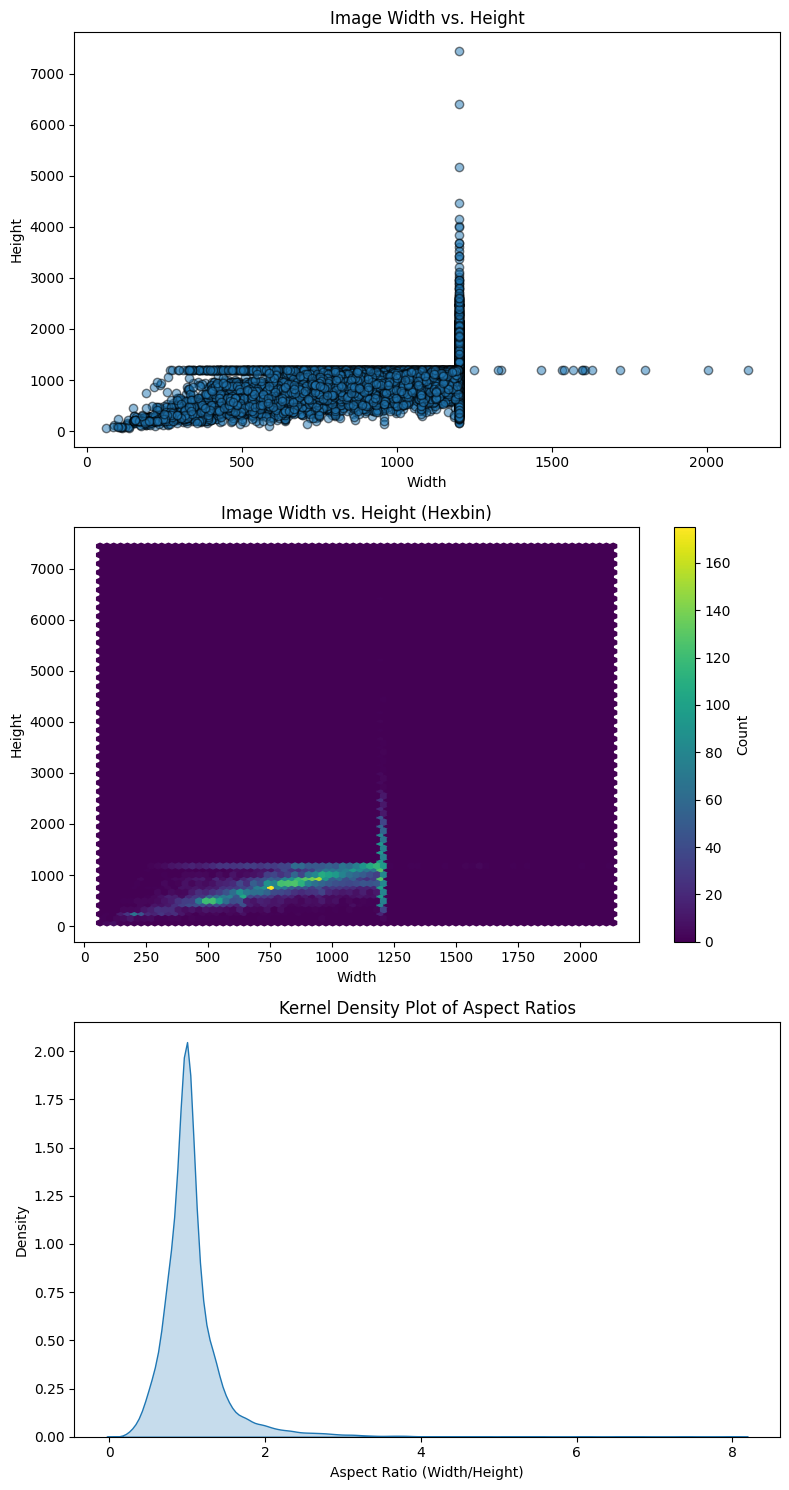

In [53]:
# Read and plot the image sizes of the original full dataset

# Replace with your file path
file_path = '/home/magnusjsc/Skrivebord/Classification-and-3D-reconstruction-of-archaeological-artifacts/python_scripts/processed_images_dimensions.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Sum of total images
total_occurrences = df['Occurrences'].sum()
print(f'Total number of image dimensions: {total_occurrences}')

# Log scale the 'Occurrences' column - More precision for large amount of data points
df['Log_Occurrences'] = np.log(df['Occurrences'])

# Calculate the 'Dimensions' column by combining 'Width' and 'Height
df['Dimensions'] = df['Width'].astype(str) + 'x' + df['Height'].astype(str)

# Calculate the 'Aspect Ratio' column
df['Aspect Ratio'] = df['Width'] / df['Height']

# Plot the figures ontop of eachother. 3 rows with 1 plot in each
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot image width vs. height
ax1.scatter(df['Width'], df['Height'],edgecolor='k' ,alpha=0.5)
ax1.set_title('Image Width vs. Height')
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')

# Create a hexbin plot for image width vs. height
hb = ax2.hexbin(df['Width'], df['Height'], gridsize=75, cmap='viridis')
ax2.set_title('Image Width vs. Height (Hexbin)')
ax2.set_xlabel('Width')
ax2.set_ylabel('Height')
# Add a colorbar to the hexbin plot
cb = plt.colorbar(hb)
cb.set_label('Count')
# Set the x-axis locator and formatter for the hexbin plot
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax2.xaxis.set_major_formatter(plt.ScalarFormatter())

# Create a KDE plot for aspect ratios
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html 
sns.kdeplot(df['Aspect Ratio'], ax=ax3, fill=True)
ax3.set_title('Kernel Density Plot of Aspect Ratios')
ax3.set_xlabel('Aspect Ratio (Width/Height)')

# Display the plots side by side
plt.tight_layout()
plt.show()

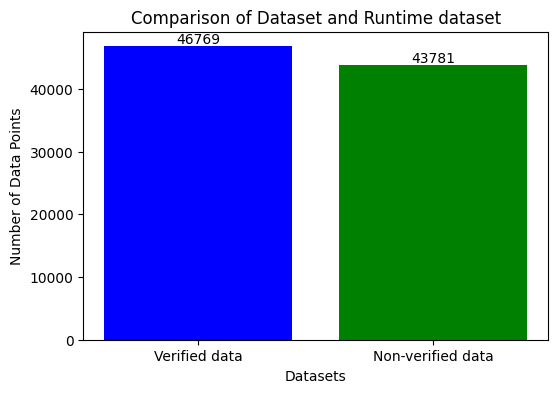

In [15]:
# Compare datasets. Training and Runtime dataset.

# Length of each dataset:
num_dataset = len(dataset_verified)
num_validation_dataset = len(dataset_non_verified)
# Dataset for the chart:
datasets = ['Verified data', 'Non-verified data']
num_data_points = [num_dataset, num_validation_dataset]
# Create barchart:
plt.figure(figsize=(6, 4))
plt.bar(datasets, num_data_points, color=['blue', 'green'])
plt.xlabel('Datasets')
plt.ylabel('Number of Data Points')
plt.title('Comparison of Dataset and Runtime dataset')
# Display the values on top of the bars
for i, v in enumerate(num_data_points):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

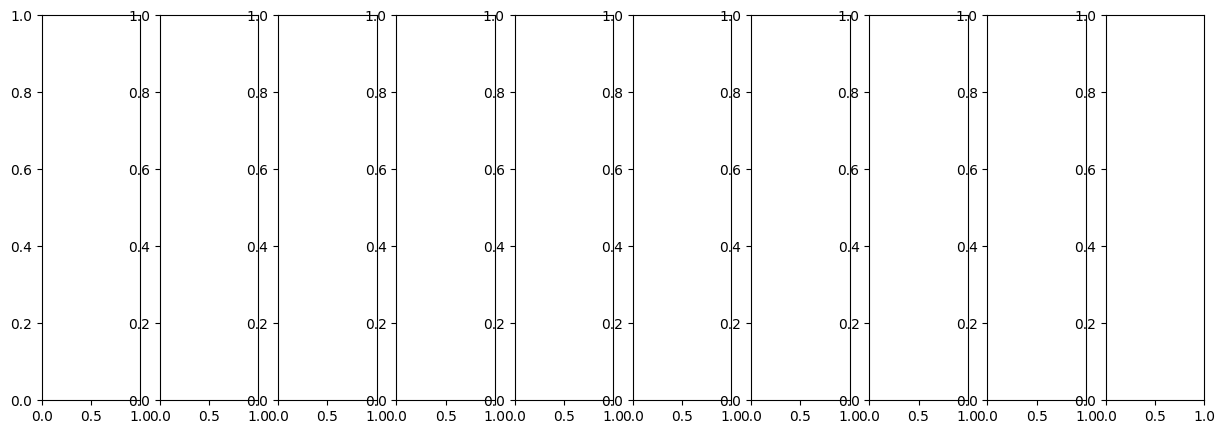

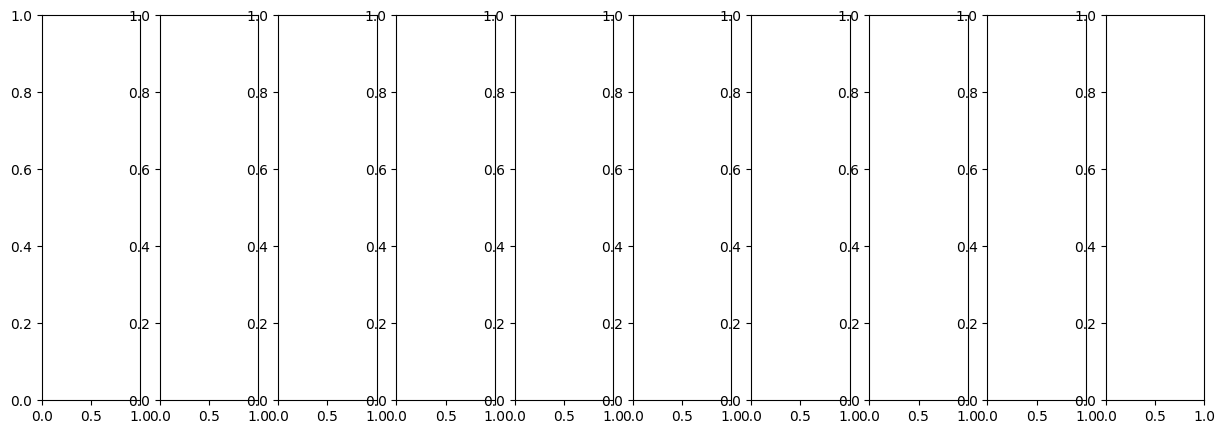

In [52]:
# Display the 10 coin images and 10 others images - how they look like
num_coin_images_to_display = 10
num_others_image_to_display = 10
#Create subplot
fig, axes = plt.subplots(1, num_coin_images_to_display, figsize=(15, 5))  # Adjust the figure(s) size as needed
fig2, axes2 = plt.subplots(1, num_others_image_to_display, figsize=(15, 5))

# TODO: GET THE DATA FROM EXTERNAL SSD STORAGE